In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import random as rand 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer_df= pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
customer_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [33]:
#Show a plot of the total number of responses.
response_count = customer_df['response'].value_counts()
response_count


no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, 'Responses')

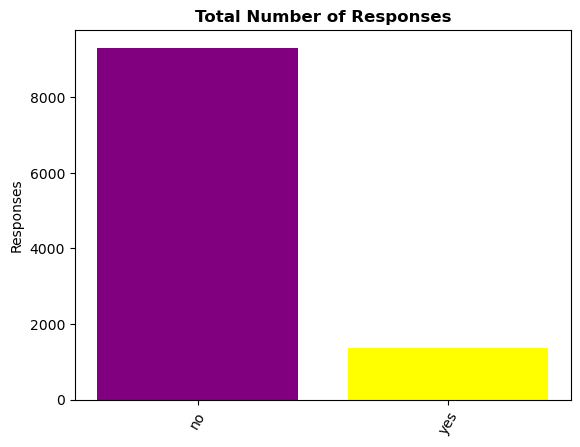

In [5]:
plt.bar(response_count.index, response_count, color=('purple','yellow'))

plt.title('Total Number of Responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"], rotation = 60) #sütunlarin adi icin.rotation da isimlerini sigdirmak icin cevirmek altinda
plt.ylabel("Responses")

In [34]:
customer_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [35]:
#- Show a plot of the response by the sales channel.



response_sales = customer_df.groupby(['response','sales_channel'])['response'].count().rename('count').reset_index()
response_sales

,response,sales_channel,count
0,no,agent,3340
1,no,branch,2665
2,no,call center,1890
3,no,web,1421
4,yes,agent,679
5,yes,branch,310
6,yes,call center,209
7,yes,web,175


In [36]:
sns.set_palette('RdYlGn') 
palette_sales_channel = {"agent": "C5", "web": "C0", "branch": "C1", "call center": "C3"}

<AxesSubplot:title={'center':'Responses by sales channel'}, xlabel='response', ylabel='count'>

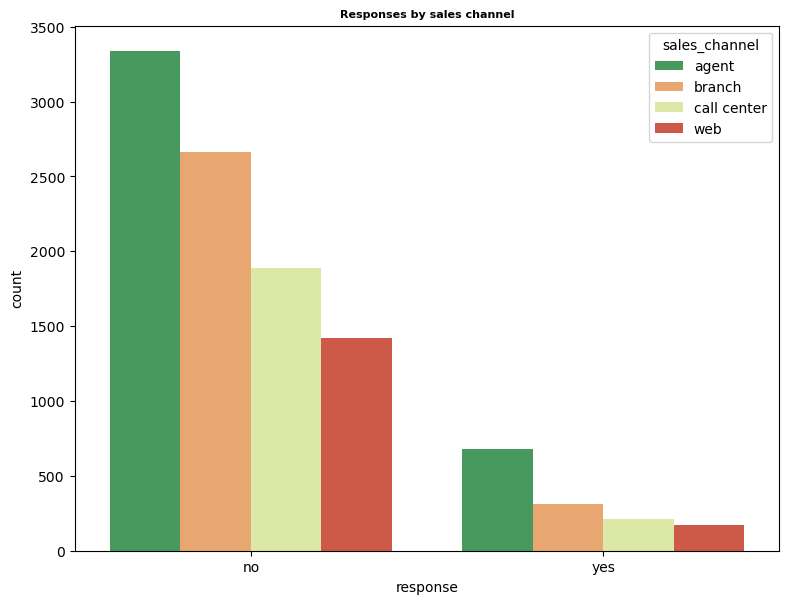

In [37]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)

plt.title('Responses by sales channel', size='8', fontweight='bold')


sns.barplot(x = response_sales['response'],y = response_sales['count'], hue = response_sales['sales_channel'], palette=palette_sales_channel)

In [47]:
response_sales = customer_df.groupby(['response','sales_channel'])['response'].count().rename('count').reset_index()
response_sales

,response,sales_channel,count
0,no,agent,3340
1,no,branch,2665
2,no,call center,1890
3,no,web,1421
4,yes,agent,679
5,yes,branch,310
6,yes,call center,209
7,yes,web,175


In [60]:
sns.set_palette('RdYlGn') 
palette_sales_channel_r = {"yes": "C5", "no": "C0"}

<AxesSubplot:title={'center':'Responses by sales channel'}, xlabel='sales_channel', ylabel='count'>

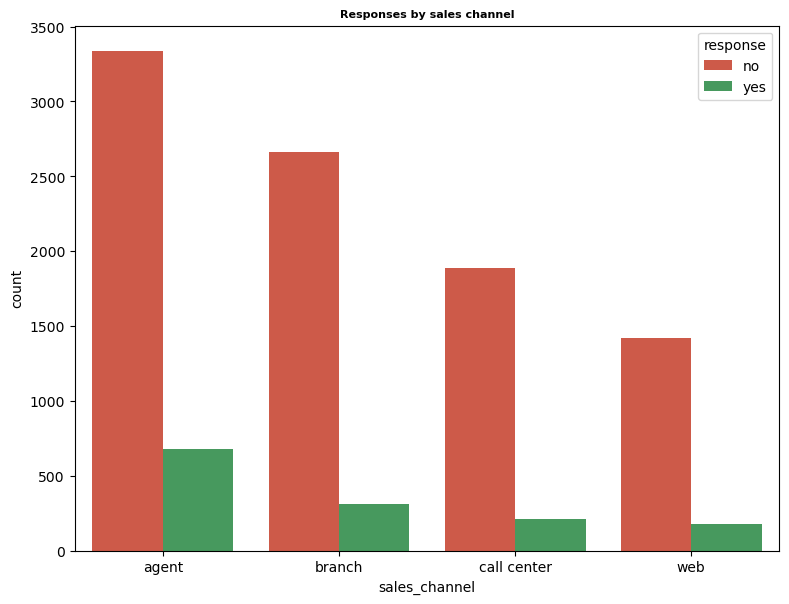

In [61]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)

plt.title('Responses by sales channel', size='8', fontweight='bold')


sns.barplot(x = response_sales['sales_channel'],y = response_sales['count'], hue = response_sales['response'], palette=palette_sales_channel_r)

In [ ]:
#- Show a plot of the response by the total claim amount.

In [41]:
response_total_claim = customer_df.groupby(['response','total_claim_amount'])['response'].count().rename('countii').reset_index()
response_total_claim

,response,total_claim_amount,countii
0,no,0,9
1,no,1,9
2,no,2,12
3,no,3,9
4,no,4,12
...,...,...,...
1358,yes,1324,7
1359,yes,1358,6
1360,yes,1416,1
1361,yes,1443,1


In [42]:
sns.set_palette('RdYlGn') 
palette_response = {"yes": "C5", "no": "C0"}

<AxesSubplot:title={'center':'Responses by total claim amount'}, xlabel='response', ylabel='countii'>

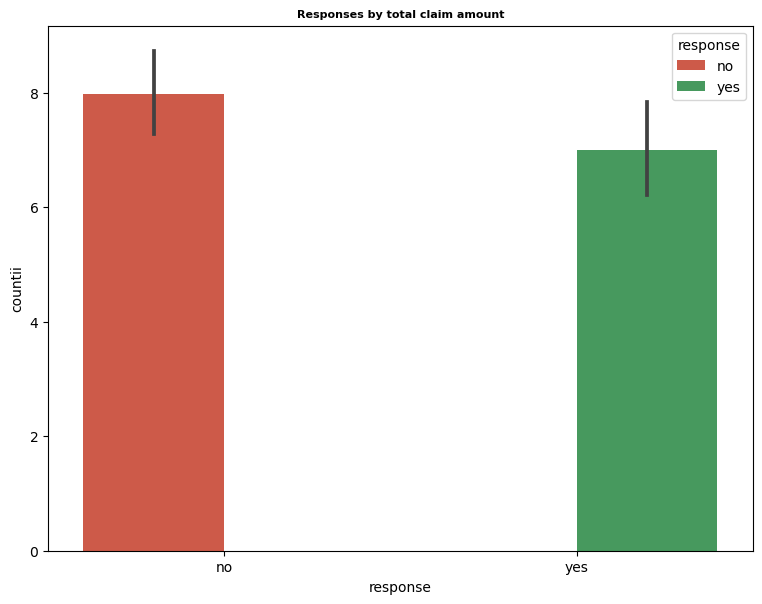

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)

plt.title('Responses by total claim amount', size='8', fontweight='bold')


sns.barplot(x = response_total_claim['response'],y = response_total_claim['countii'], hue = response_total_claim['response'], palette=palette_response)

In [ ]:
#- Show a plot of the response by income.

In [46]:
response_income = customer_df.groupby(['response','income'])['response'].count().rename('counti').reset_index()
response_income

,response,income,counti
0,no,10037,1
1,no,10074,1
2,no,10088,1
3,no,10097,2
4,no,10105,1
...,...,...,...
8344,yes,98714,1
8345,yes,99196,1
8346,yes,99265,1
8347,yes,99742,1


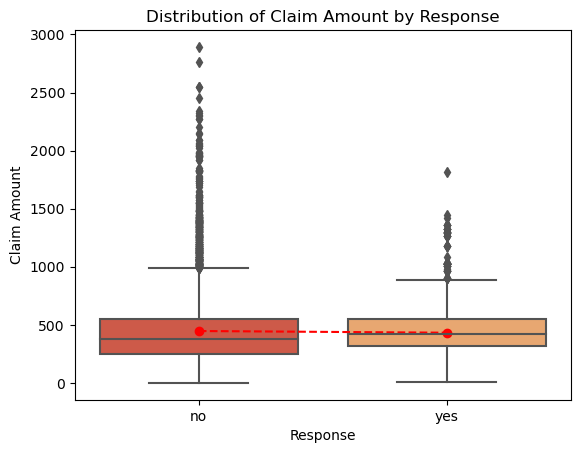

In [65]:
#- Show a plot of the response by the total claim amount.
yes_mean = customer_df[customer_df['response']=='yes']['total_claim_amount'].mean()
no_mean = customer_df[customer_df['response']=='no']['total_claim_amount'].mean()


sns.boxplot(data=customer_df, x='response', y='total_claim_amount')
plt.plot([0, 1], [yes_mean, no_mean], marker='o', linestyle='--', color='red')


plt.title('Distribution of Claim Amount by Response')
plt.xlabel('Response')
plt.ylabel('Claim Amount')

plt.show()


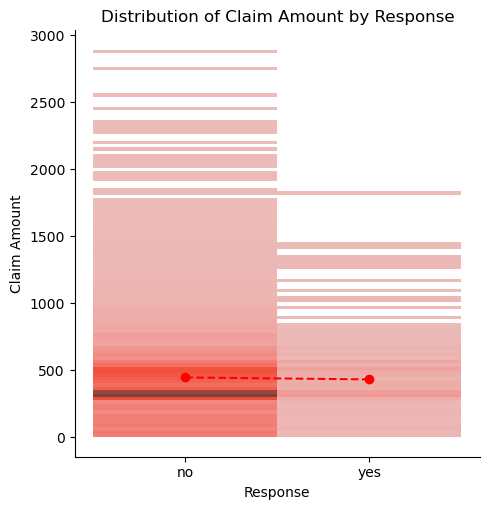

In [67]:
yes_mean = customer_df[customer_df['response']=='yes']['total_claim_amount'].mean()
no_mean = customer_df[customer_df['response']=='no']['total_claim_amount'].mean()


sns.displot(data=customer_df, x='response', y='total_claim_amount')
plt.plot([0, 1], [yes_mean, no_mean], marker='o', linestyle='--', color='red')


plt.title('Distribution of Claim Amount by Response')
plt.xlabel('Response')
plt.ylabel('Claim Amount')

plt.show()
#not very useful just tried

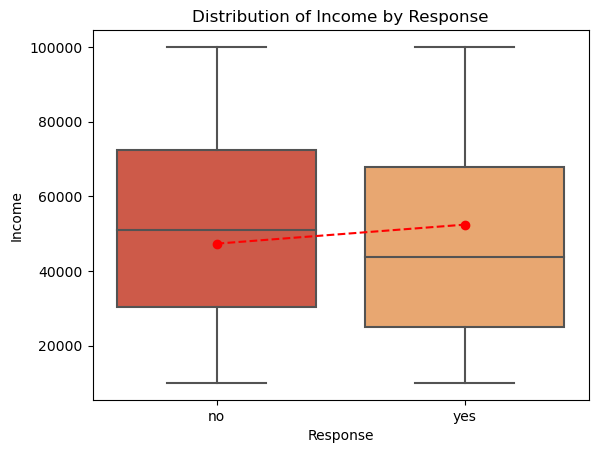

In [66]:
#- Show a plot of the response by income.


yess_mean = customer_df[customer_df['response']=='yes']['income'].mean()
noo_mean = customer_df[customer_df['response']=='no']['income'].mean()


sns.boxplot(data=customer_df, x='response', y='income')
plt.plot([0, 1], [yess_mean, noo_mean], marker='o', linestyle='--', color='red')


plt.title('Distribution of Income by Response')
plt.xlabel('Response')
plt.ylabel('Income')

plt.show()


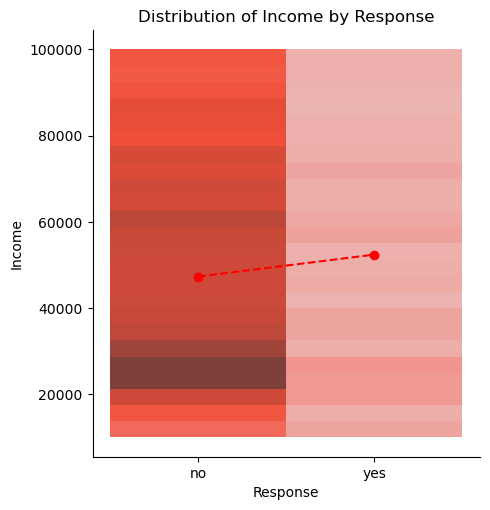

In [68]:
yess_mean = customer_df[customer_df['response']=='yes']['income'].mean()
noo_mean = customer_df[customer_df['response']=='no']['income'].mean()


sns.displot(data=customer_df, x='response', y='income')
plt.plot([0, 1], [yess_mean, noo_mean], marker='o', linestyle='--', color='red')


plt.title('Distribution of Income by Response')
plt.xlabel('Response')
plt.ylabel('Income')

plt.show()
#not very useful just tried

In [ ]:
#- (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about
#your data set and its input variables as well as relationships with the target feature.
#- Clean your notebook and make it readable and presentable with a good documentation that summarizes the 
#Data Cleaning, Exploration(including plots) Steps that you have performed.

In [69]:
#lets check per region
rel_claim_amount = customer_df.groupby(['income','region'])['total_claim_amount'].count().reset_index()
rel_claim_amount

,income,region,total_claim_amount
0,10037,north west,1
1,10074,central,1
2,10088,east,1
3,10097,central,2
4,10105,north west,1
...,...,...,...
9161,99934,north west,1
9162,99960,north west,1
9163,99961,north west,1
9164,99971,north west,1


In [70]:
sns.set_palette('RdYlGn') 
palette_region = {"central": "C5", "west region": "C0","east": "C4","north west": "C3"}

KeyboardInterrupt: 

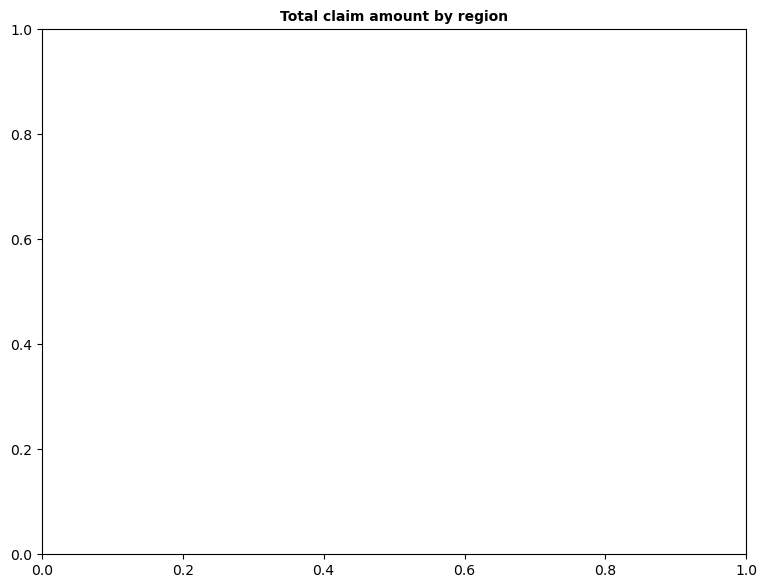

In [76]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Total claim amount by region', size='10', fontweight='bold')

sns.barplot(x = rel_claim_amount['income'],y = rel_claim_amount['total_claim_amount'], hue = rel_claim_amount['region'], palette=palette_region)